In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stat
import pylab

In [6]:
df=pd.read_csv('Dataset.csv')

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df.shape

(614, 13)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Checking for Missing values

In [18]:
feature_with_nan=[f for f in df.columns if df[f].isnull().sum()>1]
feature_with_nan

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [96]:
for i in feature_with_nan:
    print(i,' ',np.round(df[i].isnull().mean(),4))

Gender   0.0212
Married   0.0049
Dependents   0.0244
Self_Employed   0.0521
LoanAmount   0.0358
Loan_Amount_Term   0.0228
Credit_History   0.0814


In [98]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [50]:
data=df.copy()

In [51]:
for f in feature_with_nan:
    data[f]=np.where(data[f].isnull(),1,0)

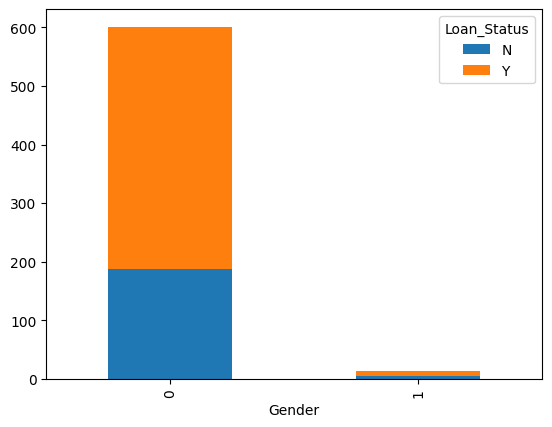

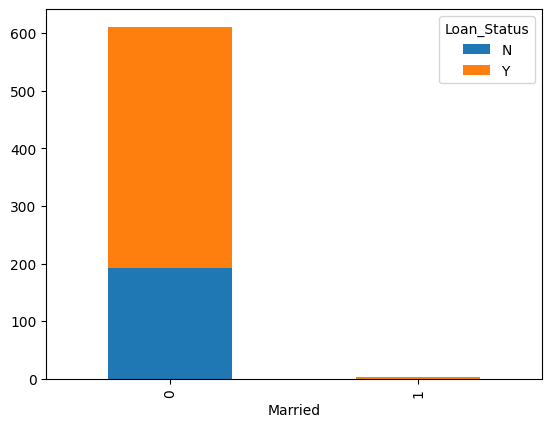

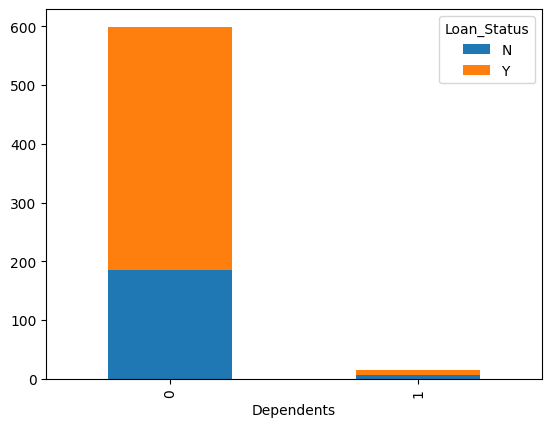

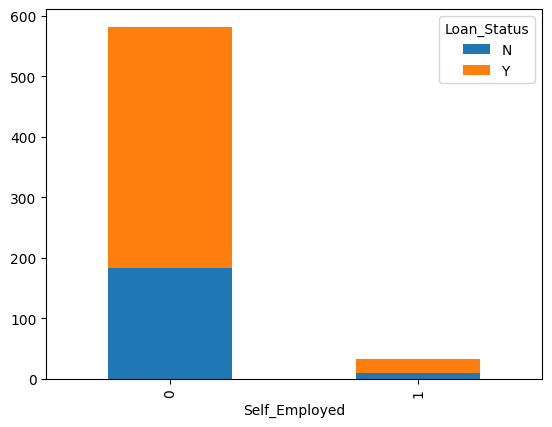

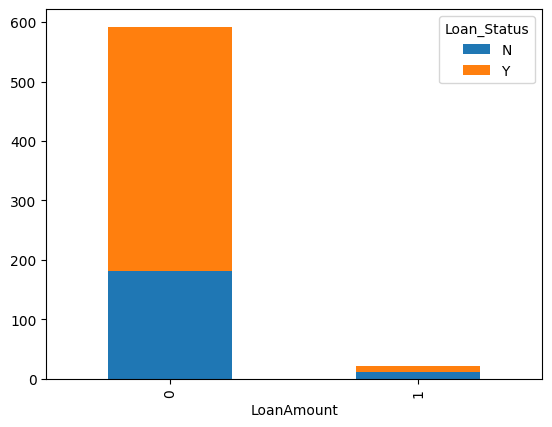

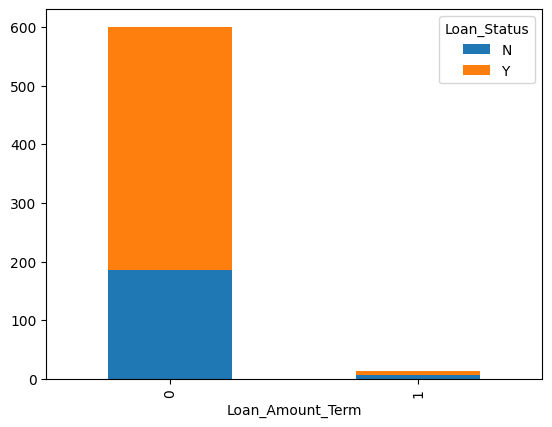

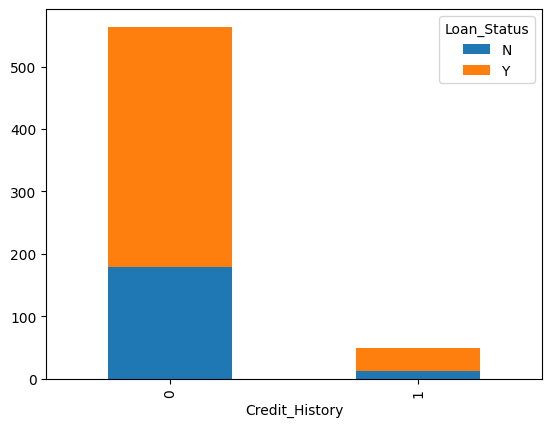

In [56]:
for f in feature_with_nan:
    data.groupby([f, "Loan_Status"]).size().unstack(1).plot(kind="bar", stacked=True)

Duplicates

In [61]:
df.duplicated().sum()

0

Unique values

In [60]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [63]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


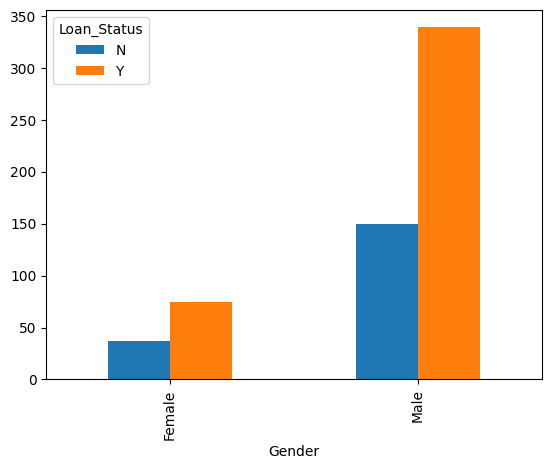

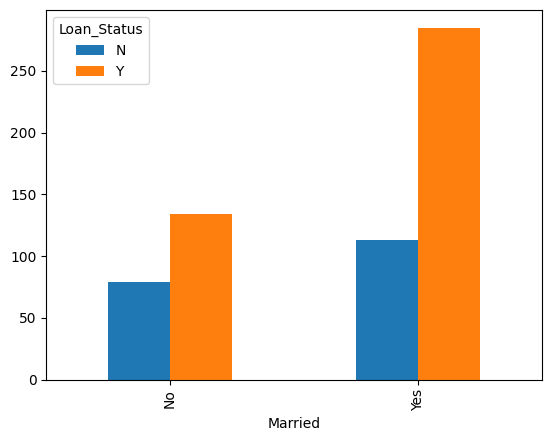

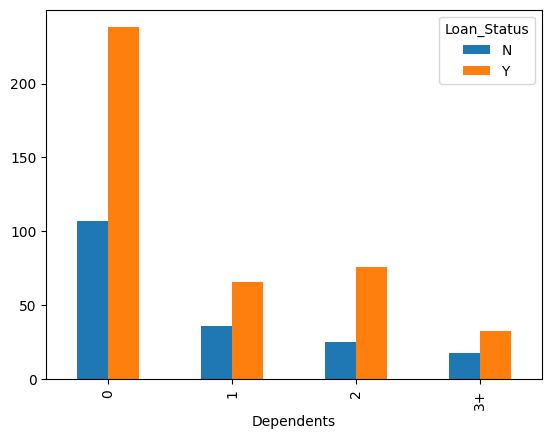

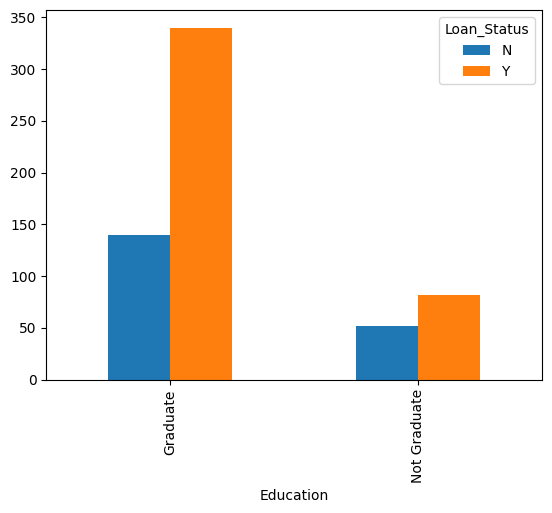

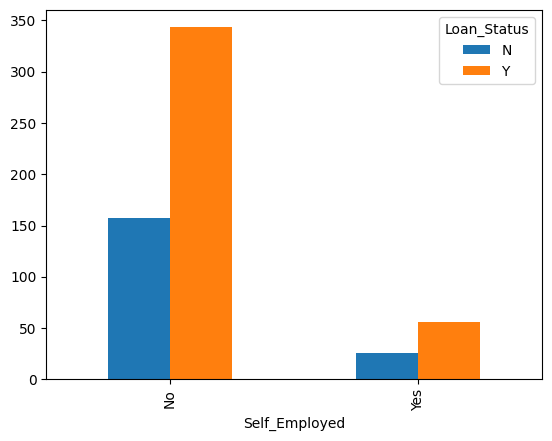

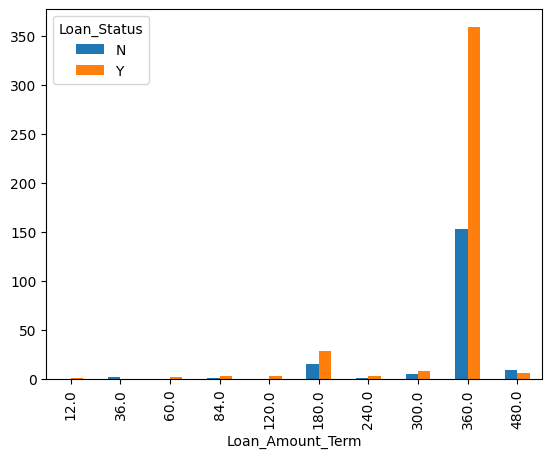

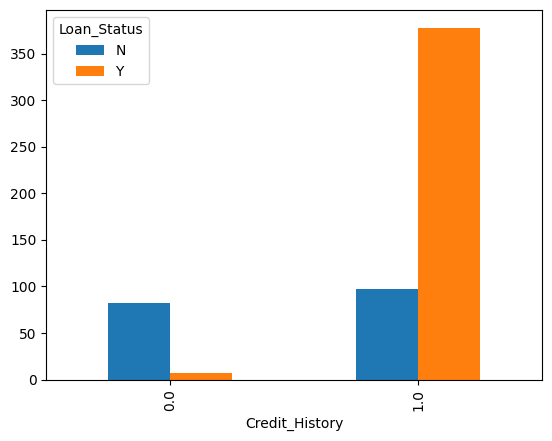

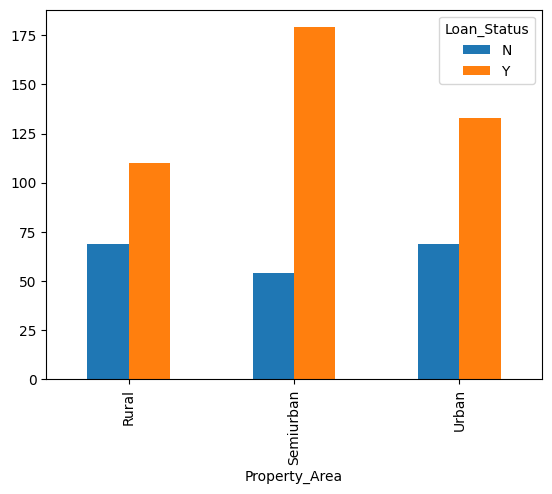

In [90]:
for f in ['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Credit_History','Property_Area']:
    df.groupby([f,'Loan_Status']).size().unstack().plot(kind='bar')
    plt.show()

In [103]:
df['Total']=df['ApplicantIncome']+df['CoapplicantIncome']

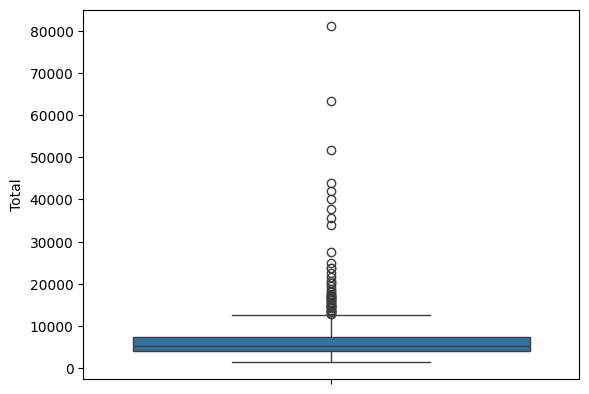

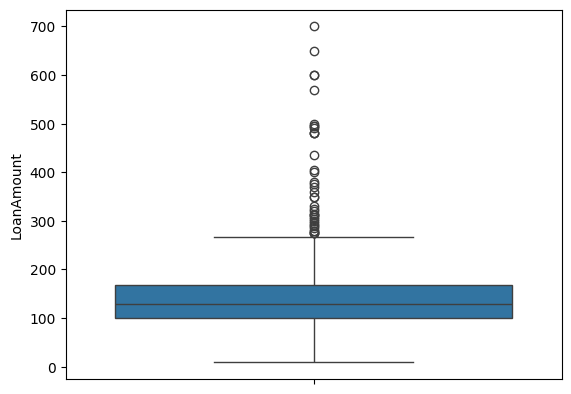

In [104]:
for f in ['Total','LoanAmount']:
    sns.boxplot(df[f])
    plt.show()

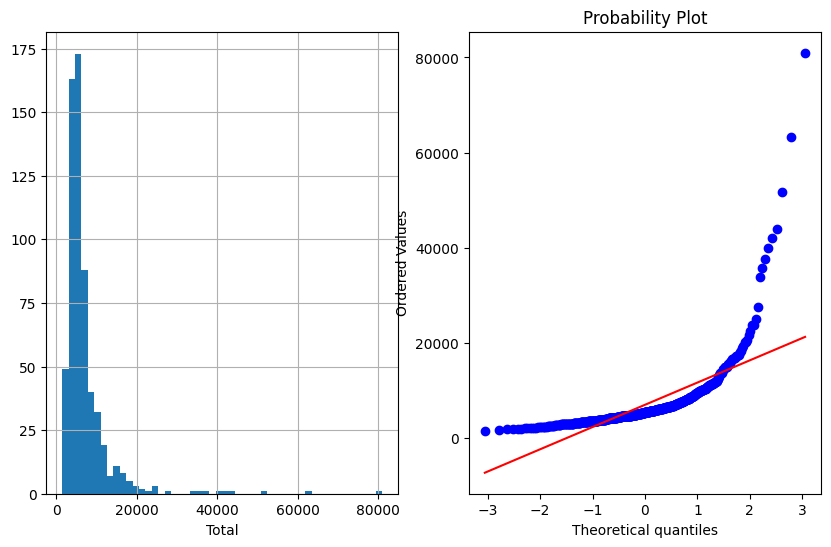

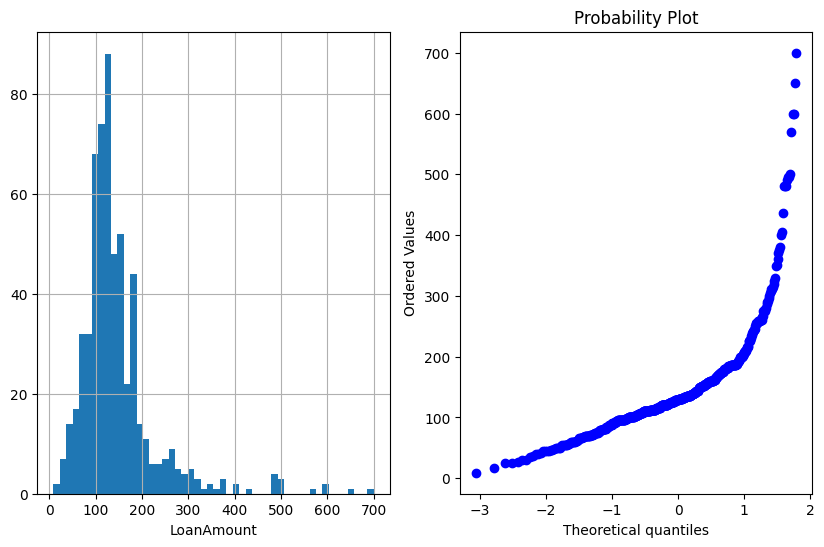

In [107]:
for i in ['Total','LoanAmount']:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[i].hist(bins=50)
    plt.xlabel(i)
    plt.subplot(1,2,2)
    stat.probplot(df[i],dist='norm',plot=pylab)
    plt.show()

In [102]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64